### ネガポジ分析をやってみよう！

In [1]:
#日本語評価極性辞書のダウンロード
!curl http://www.cl.ecei.tohoku.ac.jp/resources/sent_lex/pn.csv.m3.120408.trim > pn.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  676k  100  676k    0     0  2937k      0 --:--:-- --:--:-- --:--:-- 2955k


In [18]:
# ダウンロードしたネガポジ辞書データの読み込み
import csv
np_dic ={}
# utf-8の文字コードを指定してファイルを開く
fp = open("pn.csv","rt",encoding="utf-8")
# タブ区切り形式でCSVデータを読む
reader =csv.reader(fp,delimiter='\t')
# 各行ごとに処理を行う
for i,row in enumerate(reader):
    #行ごとのデータは以下の形式であり、
    #愛情p　～がある・高まる（存在・性質）
    #冒頭の見出し語をnameに、
    #次のp or n or e などをresultに格納
    name = row[0]
    result = row[1]
    np_dic[name] = result
    if i % 1000 == 0: print(i)
print("ok")

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
ok


In [3]:
#読み込んだ辞書データの確認
#n = ネガティブ、p = ポジティブ、e = ニュートラル
print(np_dic["激怒"])
print(np_dic["苦情"])
print(np_dic["悲観"])
print(np_dic["喜び"])
print(np_dic["勝利"])
print(np_dic["上品"])
print(np_dic["商品"])
print(np_dic["奔走"])
print(np_dic["時間"])

n
n
n
p
p
p
e
e
e


In [19]:
#janomeのインストール
!pip install janome

In [20]:
#文章に対してネガポジ分析を行うコード
# Janomeのロード
from janome.tokenizer import Tokenizer

# Tokenizer インスタンスの生成
tokenizer = Tokenizer()

# 入力した文字列に対して、
# ポジティブ単語数、ネガティブ単語数、全単語数、の3つを返す
def np_rate(input_str):
    pos_cnt = 0
    neg_cnt = 0
    word_cnt = 0
    tokens = tokenizer.tokenize(input_str)
    
    for token in tokens:
        base_form = token.base_form
        
        # ネガポジ辞書に存在するか確認して対応するほうを1ふやす
        if base_form in np_dic:
            # 単語を辞書のキーとして、そのバリューがpかnか確認する
            if np_dic[base_form] == "p":
                pos_cnt += 1
                # どんな言葉がポジ判定されているか確認用
                print("POS:" + base_form)
            if np_dic[base_form] == "n":
                neg_cnt += 1
                # どんな言葉がネガ判定しているか確認用
                print("NEG:" + base_form)
        #存在しようとしまいが単語数を１増やす
        word_cnt += 1
    return pos_cnt,neg_cnt,word_cnt
print(np_rate("今日は最高！なにもかもうまくいった。賞賛の嵐だ。悲劇なんて起きないよ"))

POS:最高
POS:賞賛
NEG:嵐
NEG:悲劇
(2, 2, 19)


## 走れメロスのデータをダウンロード＆加工

In [17]:
#!wget http://x0213.org/codetable/jisx0213-2004-std.txt

'wget' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。


### メロスはどれくらいで冷めたのか？

In [21]:
# ダウンロード関数をインポート
import aozora_dl as ad

In [6]:
#走れメロスのデータをダウンロード＆加工して使いやすく

#ダウンロードしたいURLを入力する
ZIP_URL = 'https://www.aozora.gr.jp/cards/000035/files/1567_ruby_4948.zip'

# 青空文庫からダウンロードする関数を実行
aozora_dl_text = ad.get_flat_text_from_aozora(ZIP_URL)

# 途中経過を見たい場合、以下のコメントを解除する
# 冒頭1000文字を出力する
# print(aozota_dl_text[0:1000])

# 青空文庫のテキストを加工する関数を実行
flat_text = ad.flatten_aozora(aozora_dl_text)

# 冒頭1000文字を出力する
print(flat_text[0:1000])

1567_ruby_4948.zip
Download URL =  https://www.aozora.gr.jp/cards/000035/files/1567_ruby_4948.zip
1567_ruby_4948\hashire_merosu.txt
メロスは激怒した。必ず、かの邪智暴虐の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺に逢い、こんどはもっと、語勢を強くして質問した。老爺は答えなかった。メロスは両手で老爺のからだをゆすぶって質問を重ねた。老爺は、あたりをはばかる低声で、わずか答えた。
「王様は、人を殺します。」
「なぜ殺すのだ。」
「悪心を抱いている、というのですが、誰もそんな、悪心を持っては居りませぬ。」
「たくさんの人を殺したのか。」
「はい、はじめは王様の妹婿さまを。それから、御自身のお世嗣を。それから、妹さまを。それから、妹さまの御子さまを。それから、皇后さまを。それから、賢臣のアレキス様を。」
「おどろいた。国王は乱心か

## グラフ表示のための準備運動 

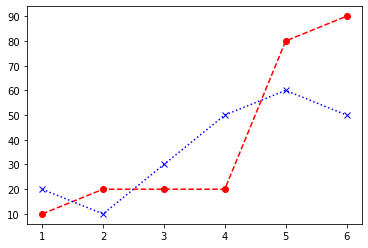

In [3]:
# 2種類の折れ線グラフを描くコード

%matplotlib inline

import matplotlib.pyplot as plt

# X座標
x = [1,2,3,4,5,6]

# Y座標は2種類
y1 = [10,20,20,20,80,90]
y2 = [20,10,30,50,60,50]

# グラフのフォーマットを指定してプロット
plt.plot(x,y1,marker="o",color="red",linestyle="--")
plt.plot(x,y2,marker="x",color="blue",linestyle=":")

plt.show()


## メロスの感情を時系列でグラフ化する

1567_ruby_4948.zip
Download URL =  https://www.aozora.gr.jp/cards/000035/files/1567_ruby_4948.zip
1567_ruby_4948\hashire_merosu.txt
NEG:激怒
NEG:暴虐
NEG:邪悪
NEG:内気
POS:楽しみ
NEG:不安
POS:賑やか
NEG:疑い
NEG:激怒
NEG:騒ぎ
NEG:暴君
POS:威厳
NEG:蒼白
NEG:暴君
NEG:憫笑
NEG:孤独
NEG:悪徳
POS:忠誠
POS:正当
POS:心構え
NEG:暴君
POS:平和
POS:平和
POS:地位
NEG:嘲笑
NEG:罪
POS:平和
POS:清らか
NEG:視線
POS:情
NEG:暴君
NEG:嘘
POS:友人
POS:友人
NEG:残虐
NEG:生意気
NEG:嘘つき
NEG:磔刑
POS:正直
NEG:罪
POS:永遠
POS:いのち
POS:大事
NEG:暴君
NEG:急ぎ
POS:陽
NEG:疲労
NEG:困憊
NEG:無理
POS:綺麗
POS:眠り
POS:明日
POS:明日
NEG:不吉
POS:陽気
POS:喜色
POS:華やか
POS:一生
NEG:未練
POS:情
NEG:呆然
POS:歓喜
POS:大切
NEG:嘘
POS:誇り
POS:大丈夫
POS:十分
POS:信実
POS:名誉
POS:大丈夫
NEG:未練
POS:好き
NEG:災難
NEG:氾濫
NEG:破壊
NEG:限り
NEG:影
POS:友達
POS:ため
NEG:煽り
POS:愛
POS:誠
POS:偉大
POS:力
POS:発揮
POS:力
POS:獅子奮迅
NEG:哀れ
POS:見事
NEG:むだ
POS:陽
NEG:山賊
POS:陽
POS:いのち
POS:命
POS:いのち
NEG:山賊
NEG:気の毒
POS:正義
POS:ため
NEG:一撃
NEG:隙
NEG:疲労
POS:まとも
NEG:眩暈
NEG:山賊
POS:真
POS:勇者
POS:情
NEG:不信
POS:前進
NEG:疲労
POS:勇者
POS:根性
NEG:不信
POS:愛
POS:信実
POS:大事
NEG:不幸
NEG:中途
NEG:疑惑
POS:無心
POS:信実
NEG:急ぎ
NEG

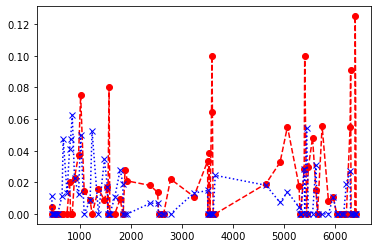

In [23]:
# メロスの感情を時系列でグラフ化するコード
# ダウンロード関数をインポート
import aozora_dl as ad

#ダウンロードしたいURLを入力する
ZIP_URL = 'https://www.aozora.gr.jp/cards/000035/files/1567_ruby_4948.zip'

# 青空文庫からダウンロードする関数を実行
aozora_dl_text = ad.get_flat_text_from_aozora(ZIP_URL)

# 青空文庫のテキストを加工する関数を実行
flat_text = ad.flatten_aozora(aozora_dl_text)

# フラットなテキストを「改行コード」で区切ってリスト形式にする
mero_list = flat_text.split('\n')

# 冒頭10行を出力する
#print(mero_list[0:10])

# グラフ作成用のx軸、y軸
# X座標(物語の進行の時間軸として、それまでの単語総数を入れる)
x = []
# Y座標は2種類＝y1にポジティブ度合い、y2にネガティブ度合いとする。
y1 = []
y2 = []

total_word_count = 0
# 作ったリストの各要素に対して処理を行う
for mero_str in mero_list:
    # リストの中身＝文字列に対してネガポジ分析を行う
    pos_count,neg_count,word_count = np_rate(mero_str)
    # 単語数が０となる行があった場合、その行を飛ばす(0除算防止)
    if word_count < 1:
        continue
    # 全単語数に対するポジティブの比率を、リストに追加する。
    y1.append(pos_count / word_count)
    # 全単語数に対するネガティブの比率を、リストに追加する。
    y2.append(neg_count / word_count)
    # これまでに出てきた単語数の合計をX軸とする。
    total_word_count += word_count
    x.append(total_word_count)
# グラフのフォーマットを指定してプロット
plt.plot(x,y1,marker="o",color="red",linestyle="--")
plt.plot(x,y2,marker="x",color="blue",linestyle=":")

plt.show()


## ネガポジ分析ツール

In [28]:
#文章に対してネガポジ分析を行うコード
# Janomeのロード
from janome.tokenizer import Tokenizer

# Tokenizer インスタンスの生成
tokenizer = Tokenizer()

# 入力した文字列に対して、
# ポジティブ単語数、ネガティブ単語数、全単語数、の3つを返す
def np_rate(input_str):
    pos_cnt = 0
    neg_cnt = 0
    word_cnt = 0
    tokens = tokenizer.tokenize(input_str)
    
    for token in tokens:
        base_form = token.base_form
        
        # ネガポジ辞書に存在するか確認して対応するほうを1ふやす
        if base_form in np_dic:
            # 単語を辞書のキーとして、そのバリューがpかnか確認する
            if np_dic[base_form] == "p":
                pos_cnt += 1
                # どんな言葉がポジ判定されているか確認用
                print("POS:" + base_form)
            if np_dic[base_form] == "n":
                neg_cnt += 1
                # どんな言葉がネガ判定しているか確認用
                print("NEG:" + base_form)
        #存在しようとしまいが単語数を１増やす
        word_cnt += 1
    return pos_cnt,neg_cnt,word_cnt


301_ruby_5915.zip
Download URL =  https://www.aozora.gr.jp/cards/000035/files/301_ruby_5915.zip
301_ruby_5915\ningen_shikkaku.txt
NEG:下げ
POS:関心
NEG:影
POS:笑顔
NEG:不快
NEG:毛虫
POS:笑顔
NEG:イヤ
POS:笑顔
POS:笑顔
NEG:奇妙
POS:表情
POS:表情
POS:高等
POS:美貌
POS:笑顔
POS:笑い
POS:巧み
POS:笑い
POS:生命
POS:充実
NEG:軽薄
POS:おしゃれ
POS:美貌
POS:美貌
NEG:奇怪
NEG:壁
POS:表情
NEG:不吉
NEG:奇怪
NEG:平凡
NEG:平凡
NEG:平凡
NEG:平凡
POS:表情
NEG:壁
POS:すっと
NEG:霧
NEG:極端
NEG:不愉快
NEG:死相
POS:表情
NEG:下げ
NEG:恥
POS:ため
POS:ため
POS:設備
POS:ため
POS:実利
POS:実利
NEG:病弱
POS:実
NEG:空腹
POS:意味
NEG:馬鹿
POS:意味
NEG:空腹
POS:さっぱり
NEG:空腹
POS:発揮
NEG:空腹
NEG:空腹
POS:豪華
NEG:無理
NEG:苦痛
POS:豪華
NEG:恐怖
POS:ため
NEG:イヤ
NEG:迷信
NEG:迷信
NEG:不安
NEG:恐怖
POS:ため
NEG:難解
NEG:晦渋
NEG:脅迫
POS:幸福
POS:幸福
NEG:不安
NEG:不安
POS:ため
POS:幸福
NEG:地獄
POS:安楽
NEG:禍
NEG:命取り
NEG:苦しみ
NEG:苦しみ
POS:解決
NEG:苦しみ
NEG:痛苦
NEG:禍
NEG:自殺
NEG:絶望
POS:確信
POS:楽
POS:満点
POS:爽快
POS:金
POS:ため
POS:金
POS:ため
NEG:不安
NEG:恐怖
POS:笑顔
POS:一番
POS:上手
POS:本当
POS:一緒
POS:まじめ
NEG:奇妙
POS:真理
POS:真理
POS:力
POS:一緒
NEG:弁解
NEG:思い違い
NEG:恐怖
NEG:非難
POS:機会
NEG:怒り
NEG:暴露
NEG:絶望
N

NEG:ショック
POS:権利
NEG:怒り
NEG:トラブル
POS:権利
POS:美質
POS:美質
POS:あこがれ
POS:無垢
POS:信頼
POS:可憐
POS:無垢
POS:信頼
NEG:罪
POS:美質
NEG:疑惑
POS:表情
POS:お金
NEG:視線
NEG:警戒
NEG:疑惑
NEG:疑惑
POS:勇気
NEG:不安
NEG:恐怖
NEG:卑屈
NEG:地獄
NEG:泥
NEG:レッテル
NEG:レッテル
NEG:不眠
NEG:持病
NEG:致死
POS:量
POS:やる気
POS:やる気
NEG:レッテル
NEG:可哀想
NEG:レッテル
POS:大丈夫
NEG:罪
NEG:過失
NEG:霧
NEG:不機嫌
POS:命
POS:笑い
NEG:滑稽
NEG:失言
NEG:苦笑
NEG:非常
POS:実現
NEG:毒
POS:お金
POS:志
POS:お金
POS:お金
POS:神妙
POS:お金
POS:お金
NEG:限り
NEG:大雪
NEG:喀血
NEG:哀れ
NEG:幻聴
NEG:不幸
NEG:不幸
NEG:不幸
NEG:不幸
NEG:抗議
NEG:抗議
POS:容易
POS:理解
NEG:不幸
NEG:罪悪
NEG:抗議
NEG:抗議
NEG:俗
NEG:わがまま
NEG:反対
NEG:罪悪
NEG:不幸
NEG:嫌悪
POS:救い
NEG:不幸
NEG:不幸
NEG:不幸
NEG:風邪
NEG:嘘
NEG:喀血
NEG:不安
POS:素直
NEG:アル中
NEG:菌
NEG:不安
NEG:病
NEG:休学
POS:ため
POS:愛情
NEG:不幸
POS:愛情
NEG:害
NEG:不潔
POS:喜び
NEG:躊躇
NEG:不安
NEG:焦燥
POS:綺麗
POS:陽気
NEG:衰弱
NEG:珍妙
POS:趣向
NEG:中毒
POS:可
NEG:中毒
NEG:患者
POS:お金
POS:期待
POS:お金
NEG:中毒
NEG:不安
POS:ため
NEG:ばか
POS:おかげ
NEG:下手くそ
POS:絵
POS:大事
NEG:中毒
NEG:ケチ
POS:ため
POS:元気
NEG:真似
NEG:不潔
POS:完全
NEG:中毒
NEG:患者
NEG:駄目
NEG:恥
NEG:罪
NEG:罪
NEG:苦悩
NEG:罪
POS:量
N

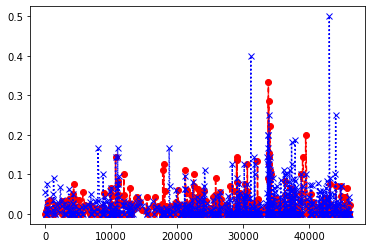

In [29]:
# メロスの感情を時系列でグラフ化するコード
# ダウンロード関数をインポート
import aozora_dl as ad

#ダウンロードしたいURLを入力する
# 「走れメロス」
# ZIP_URL = 'https://www.aozora.gr.jp/cards/000035/files/1567_ruby_4948.zip'
# 「注文の多い料理店」
#ZIP_URL = 'https://www.aozora.gr.jp/cards/000081/files/43754_ruby_17594.zip'
# 「蜘蛛の糸」
#ZIP_URL = 'https://www.aozora.gr.jp/cards/000879/files/92_ruby_164.zip'
# 「人間失格」
ZIP_URL = 'https://www.aozora.gr.jp/cards/000035/files/301_ruby_5915.zip'

# 青空文庫からダウンロードする関数を実行
aozora_dl_text = ad.get_flat_text_from_aozora(ZIP_URL)

# 青空文庫のテキストを加工する関数を実行
flat_text = ad.flatten_aozora(aozora_dl_text)

# フラットなテキストを「改行コード」で区切ってリスト形式にする
mero_list = flat_text.split('\n')

# 冒頭10行を出力する
#print(mero_list[0:10])

# グラフ作成用のx軸、y軸
# X座標(物語の進行の時間軸として、それまでの単語総数を入れる)
x = []
# Y座標は2種類＝y1にポジティブ度合い、y2にネガティブ度合いとする。
y1 = []
y2 = []

total_word_count = 0
# 作ったリストの各要素に対して処理を行う
for mero_str in mero_list:
    # リストの中身＝文字列に対してネガポジ分析を行う
    pos_count,neg_count,word_count = np_rate(mero_str)
    # 単語数が０となる行があった場合、その行を飛ばす(0除算防止)
    if word_count < 1:
        continue
    # 全単語数に対するポジティブの比率を、リストに追加する。
    y1.append(pos_count / word_count)
    # 全単語数に対するネガティブの比率を、リストに追加する。
    y2.append(neg_count / word_count)
    # これまでに出てきた単語数の合計をX軸とする。
    total_word_count += word_count
    x.append(total_word_count)
# グラフのフォーマットを指定してプロット
plt.plot(x,y1,marker="o",color="red",linestyle="--")
plt.plot(x,y2,marker="x",color="blue",linestyle=":")

plt.show()
